# **Zomato Data Analysis**

In [5]:
from google.colab import files
uploaded = files.upload()

Saving zomato.csv to zomato.csv


In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv('zomato.csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [8]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
def handleRate(value):
  value=str(value).spilt('/')
  value=value[0];
  return float(value)

  df['rate']=df['rate'].apply(handleRate)
  print(df.head())

In [22]:
def handleRate(value):
  value=str(value).spilt('/')
  value=value[0];
  return float(value)

  df['rate']=df['rate'].apply(handleRate)
  df


Text(0.5, 0, 'Type of Resturant')

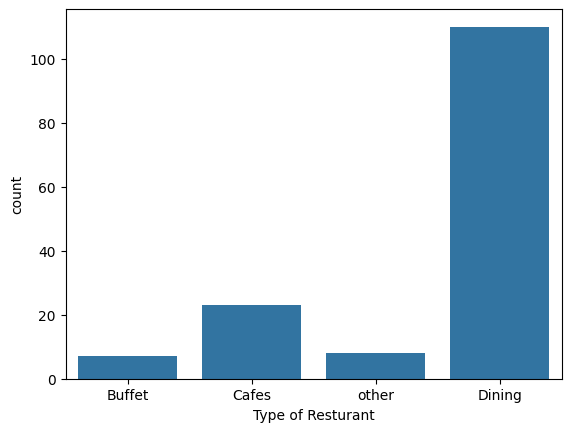

In [24]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Resturant')

Text(0, 0.5, 'Votes')

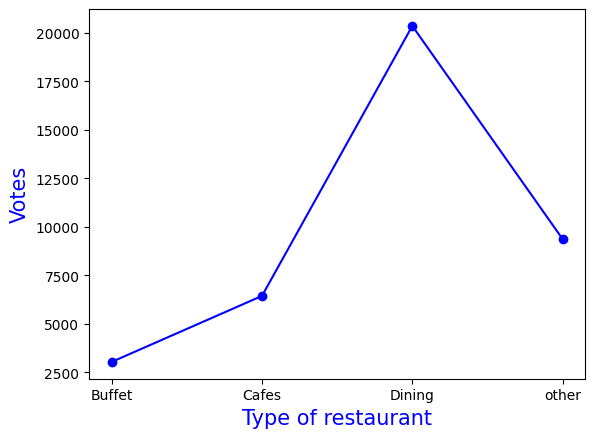

In [29]:
grouped_data = df.groupby(['listed_in(type)'])['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="blue", marker="o")
plt.xlabel("Type of restaurant", c="blue", size=15)
plt.ylabel("Votes", c="blue", size=15)

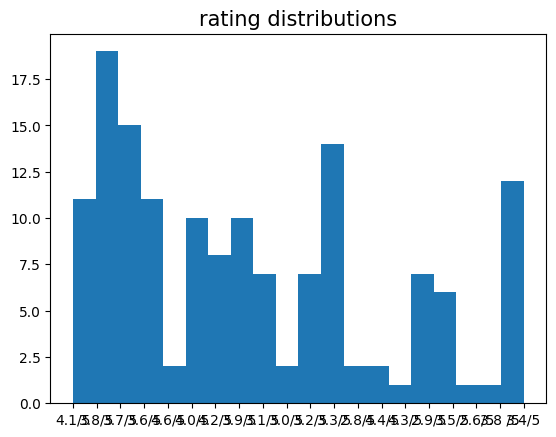

In [41]:
plt.hist(df['rate'], bins = 20)
plt.title('rating distributions', size=15)
plt.show()


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

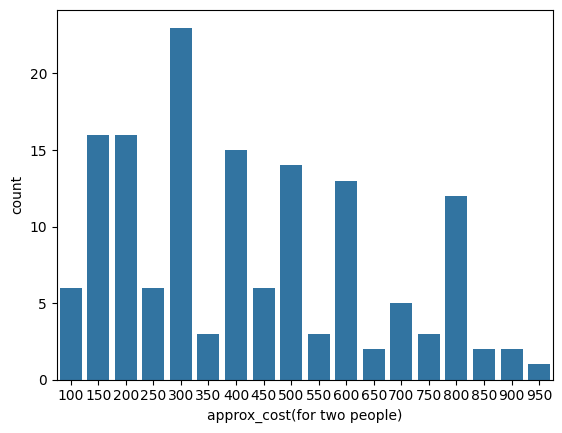

In [43]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)


<Axes: xlabel='online_order', ylabel='rate'>

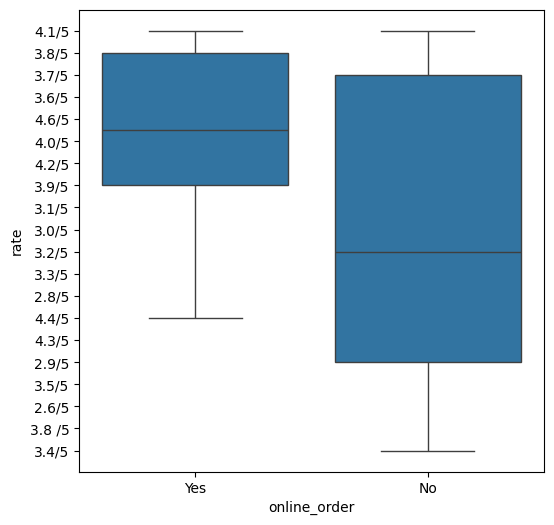

In [49]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order', y='rate', data = df)

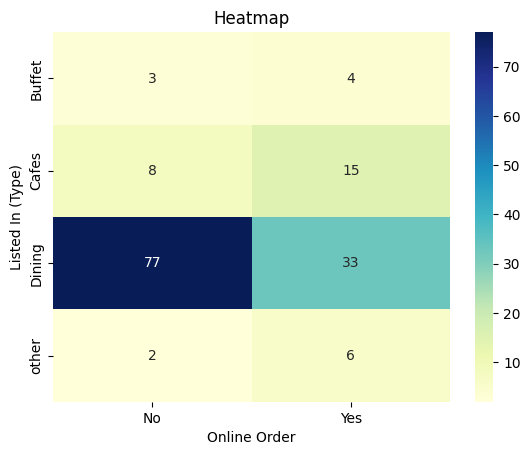

In [51]:
pivot_table = df.pivot_table(
    index='listed_in(type)',
    columns='online_order',
    aggfunc='size',
    fill_value=0
)

sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()
